#Data Understanding

dataset ini diambil dari : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("/content/drive/MyDrive/baru/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Memeriksa struktur data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Menampilkan beberapa baris yang di inginkan

In [28]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Memeriksa baris dan kolom

In [29]:
df.shape

(1000, 8)

Memeriksa tipe data

In [30]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


MEMERIKSA STATISTIK DESKRIPTIF

In [31]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Analisis Korelasi

In [32]:
print(df.corr(numeric_only=True))

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


#Data Preparation

Mencari Missing Values

In [33]:
(df.isna().sum()/len(df))*100

,0
gender,0.0
race/ethnicity,0.0
parental level of education,0.0
lunch,0.0
test preparation course,0.0
math score,0.0
reading score,0.0
writing score,0.0


Mencari Data Duplikat

In [34]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


Outliers

In [35]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
math score,0.8
reading score,0.6
writing score,0.5


Melakukan imputasi

In [6]:
columns_to_impute = ["math score", "reading score", "writing score"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

Memeriksa kembali

In [7]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
math score,0.0
reading score,0.0
writing score,0.0


Memeriksa inconsisten value

In [39]:
# Memeriksa nilai yang tidak sesuai dengan tipe data
inconsistent_types = df[~df['math score'].apply(lambda x: isinstance(x, int))]

# Memeriksa nilai yang berada di luar rentang yang logis
inconsistent_scores = df[(df['math score'] < 0) | (df['math score'] > 100) |
                          (df['reading score'] < 0) | (df['reading score'] > 100) |
                          (df['writing score'] < 0) | (df['writing score'] > 100)]

# Memeriksa nilai yang tidak sesuai dengan kategori
inconsistent_categories = df[~df['gender'].isin(['male', 'female']) |
                              ~df['lunch'].isin(['standard', 'free/reduced']) |
                              ~df['test preparation course'].isin(['none', 'completed'])]

# Periksa dengan menggabungkan
inconsistent_values = pd.concat([inconsistent_types, inconsistent_scores, inconsistent_categories]).drop_duplicates()

print(inconsistent_values)

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


Konstruk Data

menamahkan kolom lulus_semua agar dapat menegetahui kinerja setiap individu

In [40]:

def lulus_semua(row):
    batas_lulus = 60  # Batas skor kelulusan
    if row['math score'] >= batas_lulus and row['reading score'] >= batas_lulus and row['writing score'] >= batas_lulus:
        return 'Lulus'
    else:
        return 'Tidak Lulus'

# membuat kolom lulus_semua
df['lulus_semua'] = df.apply(lulus_semua, axis=1)

print(df[['math score', 'reading score', 'writing score', 'lulus_semua']].head(10))

   math score  reading score  writing score  lulus_semua
0          72             72           74.0        Lulus
1          69             90           88.0        Lulus
2          90             95           93.0        Lulus
3          47             57           44.0  Tidak Lulus
4          76             78           75.0        Lulus
5          71             83           78.0        Lulus
6          88             95           92.0        Lulus
7          40             43           39.0  Tidak Lulus
8          64             64           67.0        Lulus
9          38             60           50.0  Tidak Lulus


In [41]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,lulus_semua
0,female,group B,bachelor's degree,standard,none,72,72,74.0,Lulus
1,female,group C,some college,standard,completed,69,90,88.0,Lulus
2,female,group B,master's degree,standard,none,90,95,93.0,Lulus
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,Tidak Lulus
4,male,group C,some college,standard,none,76,78,75.0,Lulus
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95.0,Lulus
996,male,group C,high school,free/reduced,none,62,55,55.0,Tidak Lulus
997,female,group C,high school,free/reduced,completed,59,71,65.0,Tidak Lulus
998,female,group D,some college,standard,completed,68,78,77.0,Lulus


#Visualisasi Data

##Pie Chart

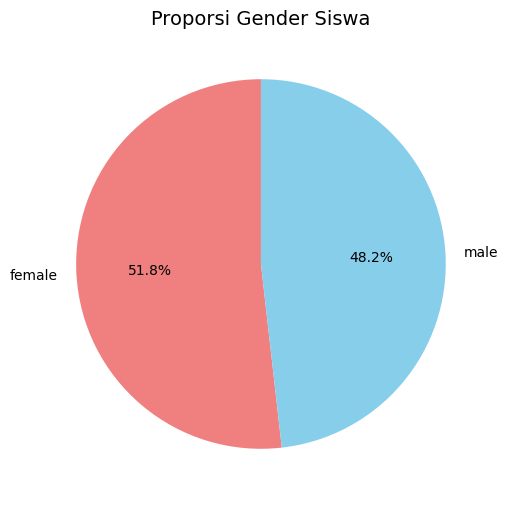

In [51]:
gender_counts = df['gender'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
ax.set_title('Proporsi Gender Siswa', fontsize=14)
plt.show()

Kesimpulan :

 Dapat dilihat dari pie chart yang saya gunakan bahwa dari data yang saya gunakan, perempuan yang di data lebih banyak daripada laki laki

##Tabel Distribusi

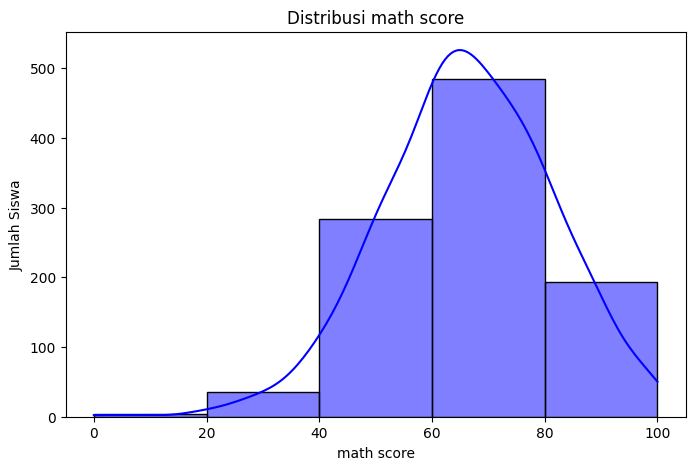

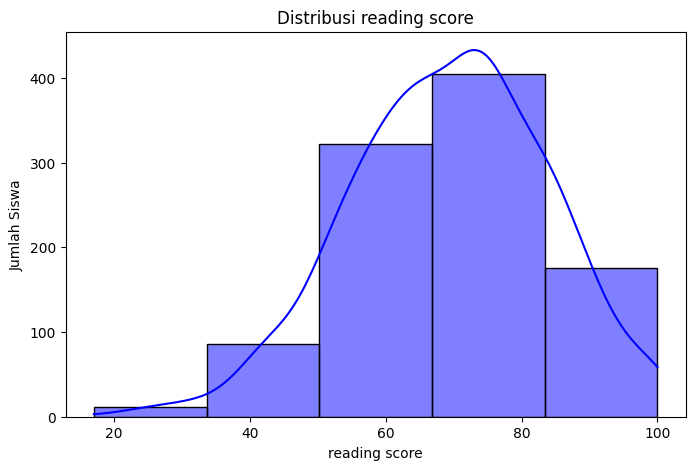

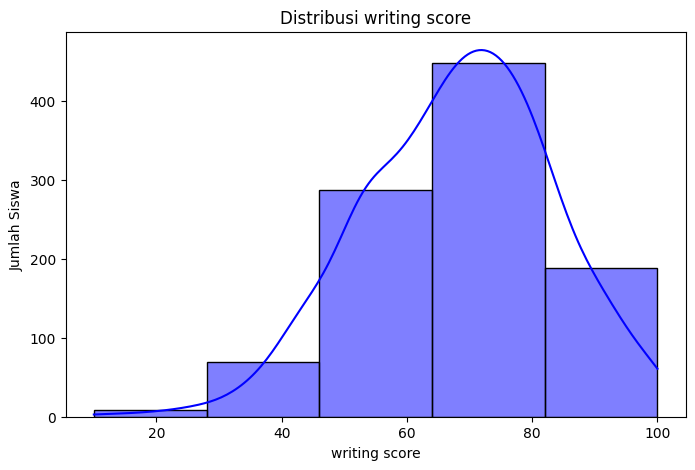

In [18]:
subjects = ['math score', 'reading score', 'writing score']

for subject in subjects:
  # Histogram (Seaborn)
  plt.figure(figsize=(8, 5))
  sns.histplot(df[subject], bins=5, kde=True, color='blue')
  plt.title(f'Distribusi {subject}')
  plt.xlabel(f'{subject}')
  plt.ylabel('Jumlah Siswa')
  plt.show()

- Grafik menunjukkan bahwa sebagian besar siswa memiliki nilai reading score antara 60 hingga 80.
- Terdapat puncak jelas pada rentang nilai sekitar 80, di mana jumlah siswa mencapai maksimum sekitar 400.

##Bar Chart

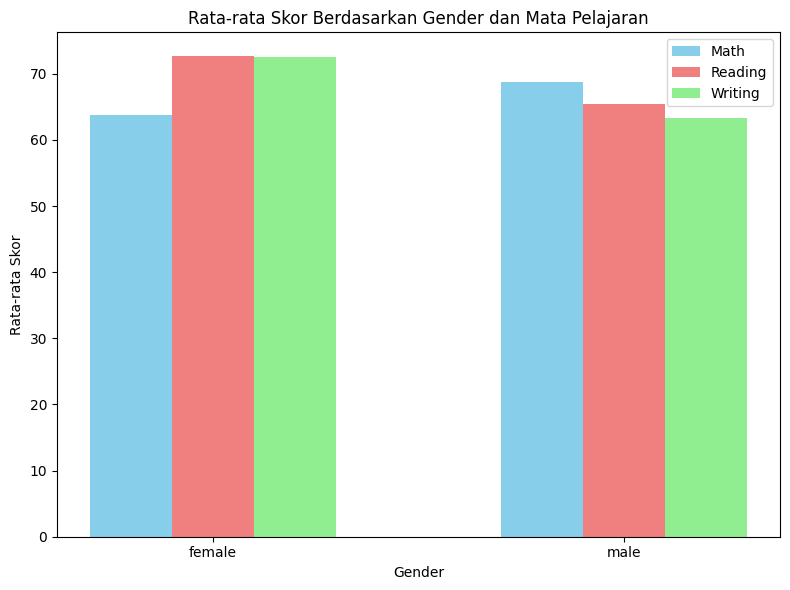

In [58]:
gender_means = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(gender_means))
width = 0.2

ax.bar(x - width, gender_means['math score'], width, label='Math', color='skyblue')
ax.bar(x, gender_means['reading score'], width, label='Reading', color='lightcoral')
ax.bar(x + width, gender_means['writing score'], width, label='Writing', color='lightgreen')

ax.set_ylabel('Rata-rata Skor')
ax.set_xlabel('Gender')
ax.set_title('Rata-rata Skor Berdasarkan Gender dan Mata Pelajaran')
ax.set_xticks(x)
ax.set_xticklabels(gender_means.index)
ax.legend()

plt.tight_layout()
plt.show()

Kesimpulan:

Perempuan memiliki skor rata-rata tertinggi dalam semua mata pelajaran, dengan Writing sebagai yang tertinggi, diikuti oleh Reading dan Math.

Laki - Laki, meskipun skornya sedikit lebih rendah dibandingkan perempuan, ada kecenderungan yang sama terkait urutan, dengan Writing masih menjadi yang tertinggi, diikuti oleh Reading dan Math.

Kesimpulan Utama:

**Perempuan cenderung memiliki skor yang lebih tinggi dibandingkan laki-laki dalam mata pelajaran.**

##Scatter Plot

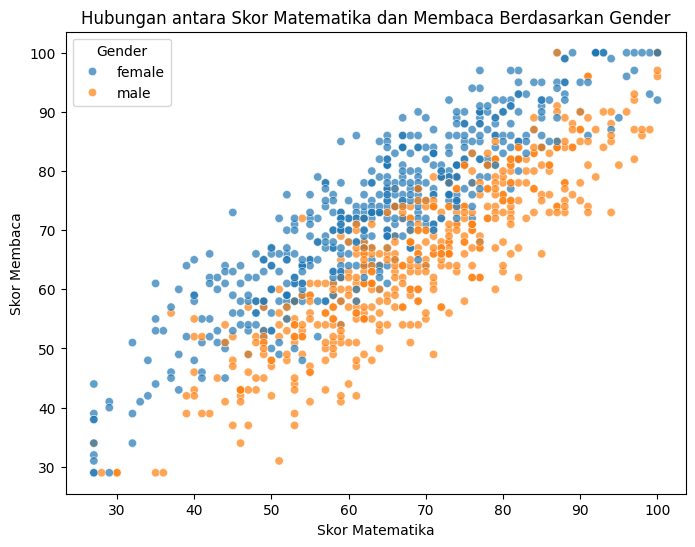

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', alpha=0.7)
plt.title('Hubungan antara Skor Matematika dan Membaca Berdasarkan Gender')
plt.xlabel('Skor Matematika')
plt.ylabel('Skor Membaca')
plt.legend(title='Gender')
plt.show()

Kesimpulan:

Terdapat hubungan positif yang jelas antara skor matematika dan skor membaca. Semakin tinggi skor matematika, semakin tinggi juga skor membaca, baik untuk laki-laki maupun perempuan.



##Heatmap

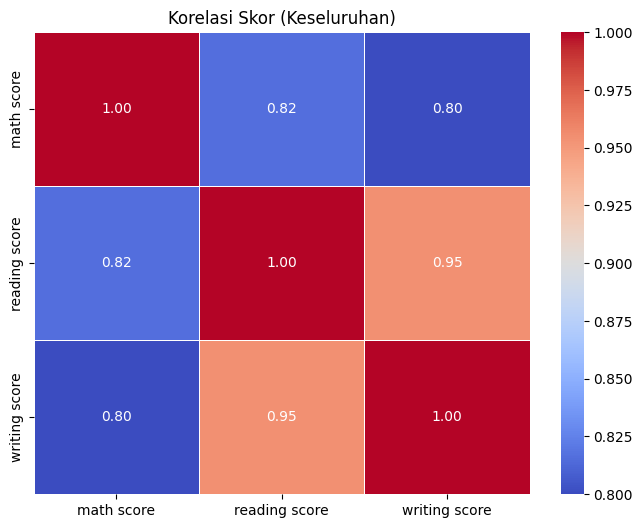

In [45]:
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Skor (Keseluruhan)')
plt.show()


Korelasi Tinggi:

Matematika dan Membaca: Korelasi 0.82, menunjukkan hubungan positif yang kuat.

Membaca dan Menulis: Korelasi 0.95, menunjukkan hubungan sangat kuat.

Matematika dan Menulis: Korelasi 0.80, menunjukkan hubungan positif yang baik.

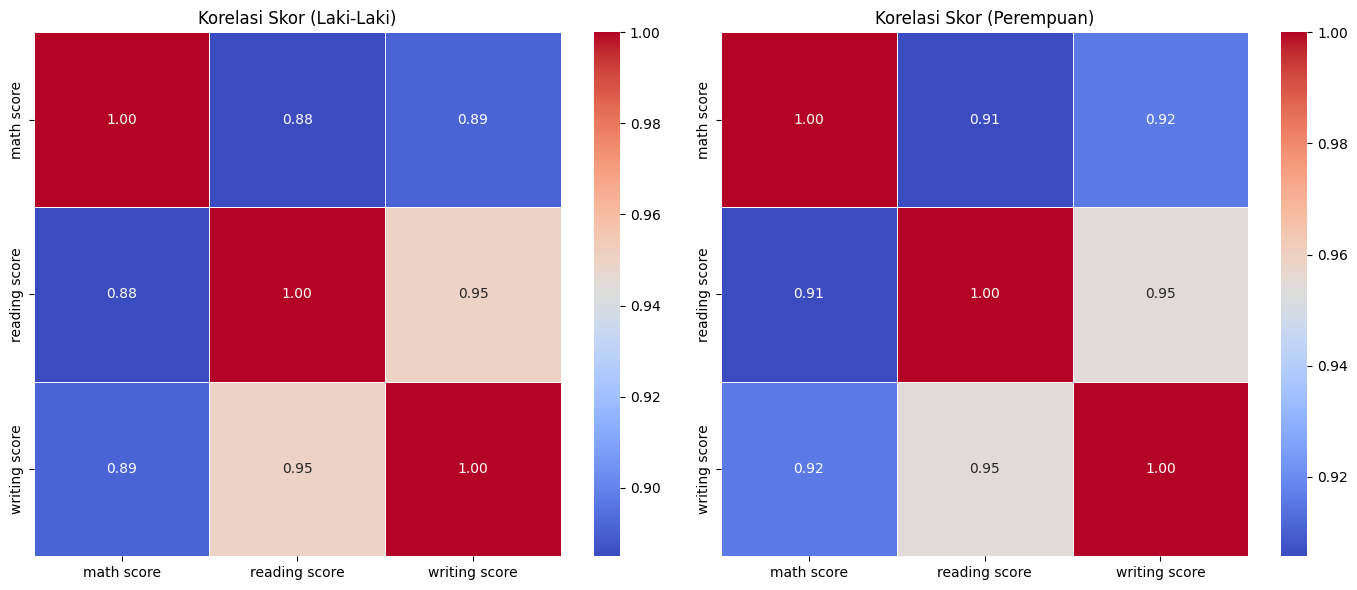

In [46]:
df_male = df[df['gender'] == 'male'][['math score', 'reading score', 'writing score']]
df_female = df[df['gender'] == 'female'][['math score', 'reading score', 'writing score']]


corr_male = df_male.corr()
corr_female = df_female.corr()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(corr_male, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Korelasi Skor (Laki-Laki)')
sns.heatmap(corr_female, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Korelasi Skor (Perempuan)')
plt.tight_layout()
plt.show()

Laki-Laki:

Terdapat korelasi tinggi antara:

Math Score dan Reading Score: 0.88

Math Score dan Writing Score: 0.89

Reading Score dan Writing Score: 0.95

Semua skor memiliki korelasi positif dan signifikan, dengan skor tertinggi antara Reading dan Writing.

Perempuan:

Korelasi yang serupa terlihat:

Math Score dan Reading Score: 0.91

Math Score dan Writing Score: 0.

Reading Score dan Writing Score: 0.95

Sekali lagi, semua skor menunjukkan hubungan positif, dengan skor tertinggi berada antara Reading dan Writing.

##Bar Chart

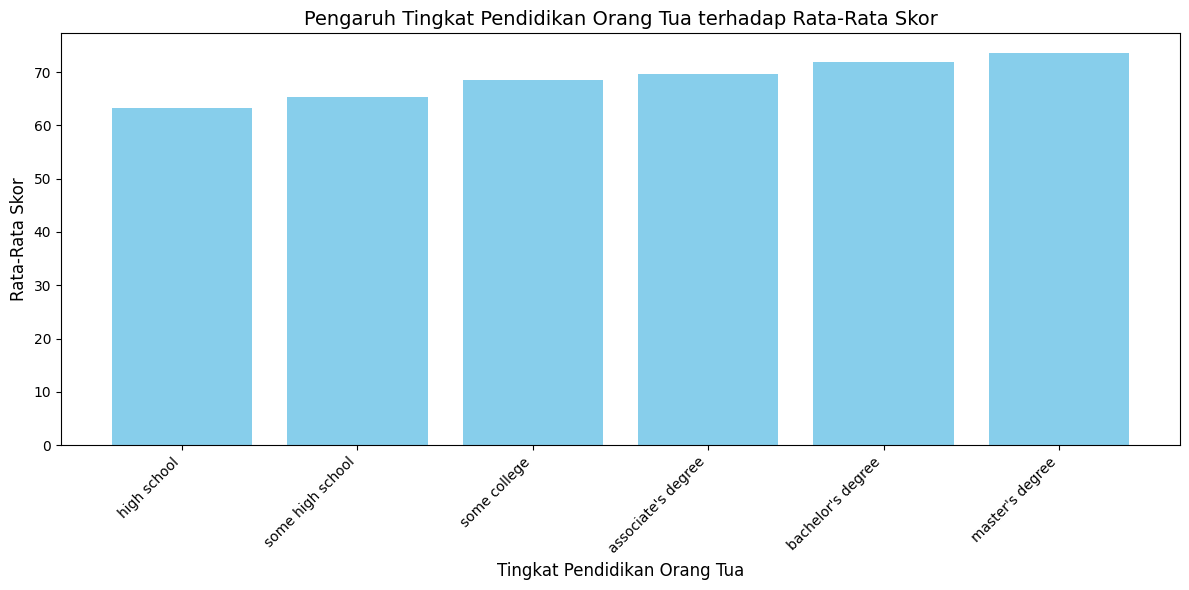

In [48]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Hitung rata-rata skor berdasarkan tingkat pendidikan orang tua
grouped_data = df.groupby('parental level of education')['average score'].mean().sort_values()

# Buat bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(grouped_data.index, grouped_data.values, color='skyblue')
ax.set_xlabel('Tingkat Pendidikan Orang Tua', fontsize=12)
ax.set_ylabel('Rata-Rata Skor', fontsize=12)
ax.set_title('Pengaruh Tingkat Pendidikan Orang Tua terhadap Rata-Rata Skor', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pendidikan Tinggi: Rata-rata skor cenderung tinggi di semua kategori pendidikan, mulai dari "high school" hingga "master's degree".

Konsistensi: Rata-rata skor tidak menunjukkan perbedaan yang signifikan antar kategori pendidikan orang tua.

Keterkaitan: Meskipun ada kecenderungan bahwa pendidikan yang lebih tinggi bisa berhubungan dengan skor yang lebih tinggi, perbedaan yang terlihat tidak cukup mencolok untuk menyimpulkan hubungan yang kuat.

**Kesimpulan:**

Meskipun tetap ada perbedaan namun tingkat pendidikan orang tua tampaknya tidak berdampak signifikan terhadap rata-rata skor, berdasarkan data yang ditampilkan dalam grafik.

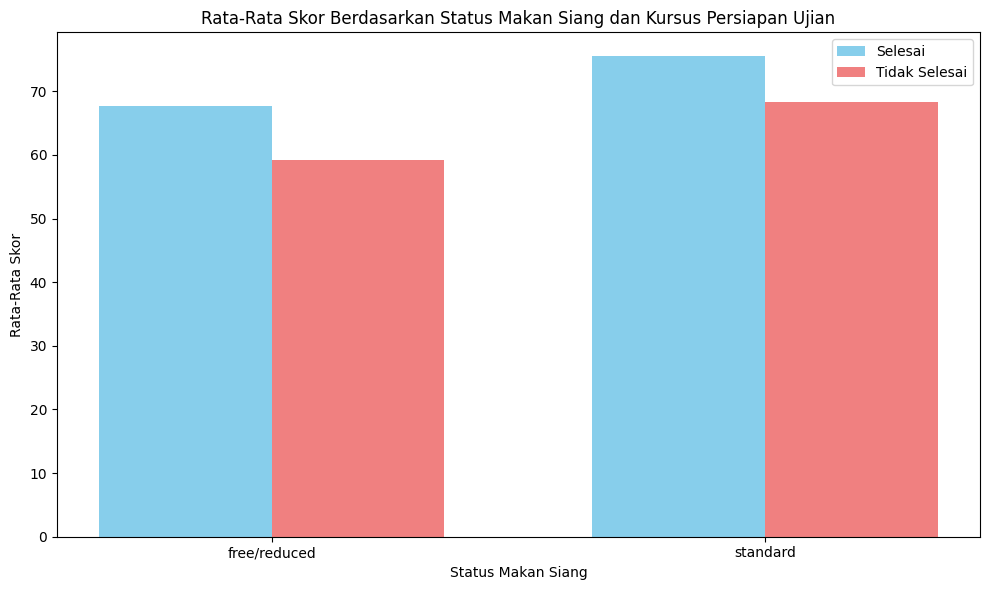

In [53]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
grouped_data = df.groupby(['lunch', 'test preparation course'])['average score'].mean().unstack()
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35 #Lebar bar

x = np.arange(len(grouped_data.index))

rects1 = ax.bar(x - width/2, grouped_data['completed'], width, label='Selesai', color='skyblue')
rects2 = ax.bar(x + width/2, grouped_data['none'], width, label='Tidak Selesai', color='lightcoral')
ax.set_ylabel('Rata-Rata Skor')
ax.set_xlabel('Status Makan Siang')
ax.set_title('Rata-Rata Skor Berdasarkan Status Makan Siang dan Kursus Persiapan Ujian')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index)
ax.legend()

plt.tight_layout()
plt.show()

Perbandingan:

Skor rata-rata pada kategori free/reduced untuk yang menyelesaikan kursus lebih tinggi dibandingkan dengan mereka yang tidak menyelesaikan.
Pada kategori standard, perbedaan antara skor selesai dan tidak selesai juga terlihat jelas, dengan yang menyelesaikan menunjukkan hasil yang lebih baik.

#Kesimpulan & Saran

#Kesimpulan

###**1. Perbedaan Gender dalam Kinerja Akademik:**

- Dari data yang telah divisualisasikan, jumlah siswa perempuan lebih banyak dibandingkan dengan siswa laki-laki.

- Perempuan memiliki skor rata-rata yang lebih tinggi dibandingkan laki-laki di semua mata pelajaran (Matematika, Membaca, dan Menulis).

- Mata pelajaran dengan skor tertinggi untuk perempuan adalah Writing, diikuti oleh Reading dan Math. Pola serupa terlihat pada laki-laki, meskipun skor mereka sedikit lebih rendah.

**Kesimpulan:**

Perempuan cenderung memiliki kinerja akademik yang lebih baik dibandingkan laki-laki secara keseluruhan, terutama dalam mata pelajaran Membaca dan Menulis.

###**2. Hubungan Antar Mata Pelajaran:**

Terdapat hubungan positif yang kuat antara skor Matematika, Membaca, dan Menulis:

- Korelasi antara Membaca dan Menulis sangat tinggi (0.95), menunjukkan bahwa siswa yang baik dalam Membaca cenderung juga baik dalam Menulis.

- Korelasi antara Matematika dan Membaca (0.82) serta Matematika dan Menulis (0.80) juga menunjukkan hubungan positif yang signifikan.

Ketika data dipisahkan berdasarkan gender:

- Laki-laki menunjukkan korelasi tertinggi antara Membaca dan Menulis (0.95).

- Perempuan juga menunjukkan pola serupa dengan korelasi tertinggi antara Membaca dan Menulis (0.95).

**Kesimpulan:**

- Siswa yang memiliki kemampuan tinggi dalam satu mata pelajaran cenderung memiliki kemampuan tinggi dalam mata pelajaran lainnya.

- Hubungan paling kuat terlihat antara Membaca dan Menulis.

###**3. Pengaruh Tingkat Pendidikan Orang Tua:**

Rata-rata skor siswa sedikit meningkat dengan tingkat pendidikan orang tua yang lebih tinggi. Namun, perbedaan rata-rata skor antar kategori tingkat pendidikan orang tua tidak signifikan secara statistik. Siswa dengan orang tua berpendidikan "master's degree" memiliki rata-rata skor tertinggi, tetapi perbedaannya tidak mencolok dibandingkan dengan kategori lain.

**Kesimpulan:**

Tingkat pendidikan orang tua memiliki pengaruh kecil terhadap kinerja akademik siswa, tetapi bukan faktor penentu utama.

###**4. Pengaruh Status Sosial Ekonomi (Rata - rata skor berdasarkan status makanan):**

Siswa dengan status makan siang "standard" memiliki rata-rata skor yang lebih tinggi dibandingkan dengan siswa "free/reduced".

Kursus persiapan ujian memberikan dampak positif pada kedua kelompok:

- Pada kategori "free/reduced", siswa yang menyelesaikan kursus memiliki skor rata-rata yang lebih tinggi dibandingkan dengan mereka yang tidak menyelesaikan.

- Pada kategori "standard", perbedaan ini juga terlihat jelas.

**Kesimpulan:**

- Status sosial ekonomi memengaruhi kinerja akademik siswa, dengan siswa dari latar belakang ekonomi lebih baik (makan siang "standard") cenderung memiliki performa akademik lebih tinggi.

- Kursus persiapan ujian efektif untuk meningkatkan skor rata-rata pada kedua kelompok.


#Saran

- Fokus pada program bimbingan belajar tambahan untuk siswa dari latar belakang ekonomi kurang mampu

- Memberikan dukungan khusus kepada siswa laki-laki untuk meningkatkan kinerja mereka di bidang Membaca dan Menulis